# CSCI 2000U - Scientific Data Analysis


## Introduction

As global suicide rates are increasing, we chose a dataset that provides enough data with a wide range of attributes that can demonstrate a correlation between key socio-economic factors (i.e., the status of particular groups) and suicide rates. Since this dataset provides socio-economic background for each nation on the basis of years, we can attribute increased/decreased sucicide rates among different groups within a particular time, generation, country, etc. Therefore, the collection of such data can demonstrate certain indicators of increased suicide rates, which is useful in the cause of suicide prevetion.

### Team Member's Contributions:

Yaksh Joshi - Worked on Global Deaths dataset (cleaning to EDA) and contributed to the readme.md
<br>
Olivia Ramos - Worked on discussion, potential data analysis, correlation matrix, generation distribution, gender-year line plot, country_avg dataframe, and top countries by suicide average bar chart
<br>
Umairuddin Mohammed - Worked on conclusion for jupyter notebook and readme.md
<br>
Ajaane Kanagasabai - Worked on Analysis of Data (including the cleaning and merging of the original dataset and continents dataset), and data visualization of world, continents and country data.

## Description of Data

### The Dataset
**Suicide Rates Overview 1985 to 2016**

*Source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016*

This dataset contains the suicide rates of all the countries from 1985 to 2016.


- country - Country in which data is from
- year - The year in which the data is collected from
- sex - Sex of the individual
- age - Age of the individual (in age groups)
- suicides_no - Number of suicides
- population - Population of each country in 'country'
- suicides/100k pop - Suicide rates per 100k of population
- HDI for year - Human Develop Index of each year
- gdp_for_year (\\$) - Gross Domestic Product of each year
- gdp_per_capita (\\$) - Ratio between the country’s GDP and its population
- generation - Generation that the individual is a part of

<br>

This dataset is a compilation of 4 other datsets which can be found here:
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

## Analysis of Data

In [ ]:
#importing used libraries
import csv
import re
import pandas as pd
from pandas.api.types import CategoricalDtype
from functools import reduce
import numpy as np
import calendar
import datetime
import string
import matplotlib.pyplot as plt


import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns


# reading the dataset from csv file using pandas
data = pd.read_csv("master.csv")
    

### Getting to know the data

Displaying the first 5 records

In [ ]:
data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
data.shape

(27820, 12)

As seen above, this dataset has 27820 records with 12 attributes.


<br>
<br>
Basic numeric summary of the dataset attributes:

In [ ]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:

print("The dataset has data from the year", data['year'].sort_index(ascending=True)[0], "to", data['year'].sort_index(ascending=True).values[-1]) 

The dataset has data from the year 1987 to 2014


In [ ]:
print("There are", data['country'].nunique(), "unique countries represented in this dataset.")

There are 101 unique countries represented in this dataset.


In [ ]:
print("There are", data['age'].nunique(), "unique age groups represented in this dataset. They are", np.unique(data['age'].values))

There are 6 unique age groups represented in this dataset. They are ['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']


In [ ]:
print("There are", data['generation'].nunique(), "unique generations represented in this dataset. They are", np.unique(data['generation'].values))

There are 6 unique generations represented in this dataset. They are ['Boomers' 'G.I. Generation' 'Generation X' 'Generation Z' 'Millenials'
 'Silent']


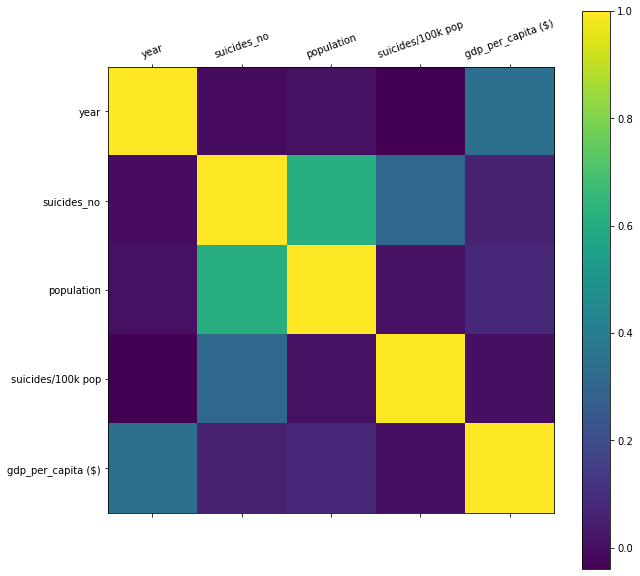

In [ ]:
def plot_matrix(df, size):
    df = df.dropna('columns')
    c_plot = df.corr()
    plt.figure(figsize = (size, size))
    c_mat = plt.matshow(c_plot, fignum = 1)
    plt.xticks(range(len(c_plot.columns)), c_plot.columns, rotation=20)
    plt.yticks(range(len(c_plot.columns)), c_plot.columns)
    plt.colorbar(c_mat)
    plt.show()
plot_matrix(data, 10)

From the correlation matrix, we can see that there is a weak correlation between most the of variables in regards to 'suicides_no' (number of suicides) and 'suicides/100k pop' (suicides per 100k of the population). The exception to this is when comparing these variables to population. As expected, a greater population will yield a higher suicide rates. In addition, there seems to be a slight positive increase in the correlation between these two variables (suicide rates) and the GDP per capita. Does an increase in GDP mean higher suicide rates? First, let's analyze the distribution of generation:

[Text(0, 0.5, 'Generation'), Text(0.5, 0, 'Count')]

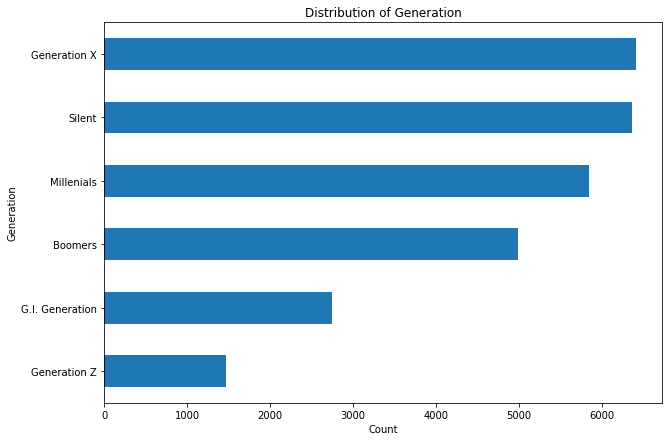

In [ ]:
gen_count = data['generation'].value_counts(ascending=True)
gen_count.plot.barh(title='Distribution of Generation', figsize=(10, 7)).set(xlabel='Count', ylabel='Generation')

### Cleaning the Dataset

***Tasks***
<br>
1) Rename columns
<br>
2) Filter out countries and year(s) with 0 data
<br>
3) Reorder age groups in chronological order
<br>
4) Remove country-year (not needed/redundant)
<br> 
5) Remove HDI for year (too much missing data to use)
<br>
6) Fix names of countries to match other dataset (add continents)

***Renaming columns***

In [ ]:
data = data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age',
                          'suicides_no':'Suicide No.','population':'Population','suicides/100k pop':'Suicides/100k Pop',
                          'country-year':'CountryYear','HDI for year':'HDI For Year',' gdp_for_year ($) ':'GDP For Year',
                          'gdp_per_capita ($)':'GDP Per Capita','generation':'Generation'})
data.head(5)

,Country,Year,Gender,Age,Suicide No.,Population,Suicides/100k Pop,CountryYear,HDI For Year,GDP For Year,GDP Per Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


***Filtering out countries/years with no data*** <br>
Bahamas, Dominica, Saint Kitts and Nevis, Saint Vincent and Grenadines were removed because of the lack of data. Any data from 2016 was also removed.

In [ ]:
data.drop(data[data.Country == 'Bahamas'].index, inplace = True)
data.drop(data[data.Country == 'Dominica'].index, inplace = True)
data.drop(data[data.Country == 'Saint Kitts and Nevis'].index, inplace = True)
data.drop(data[data.Country == 'Saint Vincent and Grenadines'].index, inplace = True)
data.drop(data[data.Year == '2016'].index, inplace = True)

***Reordering age groups in chronological order:***

In [ ]:
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
data["Age"] = pd.Categorical(data["Age"], categories=age_order) 
data.sort_values(by = ['Country', 'Year', 'Gender', 'Age'], inplace = True)
data.head(10)

,Country,Year,Gender,Age,Suicide No.,Population,Suicides/100k Pop,CountryYear,HDI For Year,GDP For Year,GDP Per Capita,Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
10,Albania,1987,female,55-74 years,0,144600,0.00,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
11,Albania,1987,male,5-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [ ]:
data.isnull().sum()

Country                  0
Year                     0
Gender                   0
Age                      0
Suicide No.              0
Population               0
Suicides/100k Pop        0
CountryYear              0
HDI For Year         18988
GDP For Year             0
GDP Per Capita           0
Generation               0
dtype: int64

***Removing HDI For Year and CountryYear*** <br>
Since 'HDI For Year' is missing so much data, we decided to remove it. CountryYear is being removed because it is redundant.

In [ ]:
data=data.drop(['HDI For Year','CountryYear'],axis=1)
data.head(5)

,Country,Year,Gender,Age,Suicide No.,Population,Suicides/100k Pop,GDP For Year,GDP Per Capita,Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
10,Albania,1987,female,55-74 years,0,144600,0.00,"2,156,624,900",796,G.I. Generation


### Supplementary Dataset <br>
#### **Country to Continent**
<br> 
Source: https://www.kaggle.com/statchaitya/country-to-continent

This dataset contains information on countries, including the continent and sub-region it belongs to. <br>

- country - Country the data belongs to.
- code_2 - 2 letter country code
- code_3 - Alternative 3 letter country code
- country_code - Numeric country code
- iso_3166_2 - ISO 3166 Standard
- continent - Continent the country belongs to 
- sub_region - Subregion the country belongs o
- region_code - Numeric region code
- sub_region_code - Numeric subregion code

<br>
Let's take a look at the first 5 records.

In [ ]:
continent = pd.read_csv("countryContinent.csv", encoding="ISO-8859-1")
continent.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [ ]:
continent = continent.rename(columns={'country':'Country','code_2': 'Code 2', 'code_3': 'Code 3', 'country_code': 'Country code',
                                      'iso_3166_2': 'ISO','continent':'Continent', 'sub_region':'Subregion', 
                                     'region_code':'Region code', 'sub_region_code': 'Subregion code'})
continent.head()

,Country,Code 2,Code 3,Country code,ISO,Continent,Subregion,Region code,Subregion code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


We only need the country, continent and subregion so we can drop the rest of the columns

In [ ]:
continent = continent.drop(['Code 2','Code 3', 'Country code', 'ISO', 'Region code', 'Subregion code'], axis = 1)
continent.head()

,Country,Continent,Subregion
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


***Fixing country names*** <br>
Need to fix country names to merge 2 datasets

In [ ]:
data['Country'] = data['Country'].apply(lambda x: 'United States of America' if x == 'United States' else x)
continent['Country'] = continent['Country'].apply(lambda x: 'Republic of Korea' if x == 'Korea (Republic of)' else x)
continent['Country'] = continent['Country'].apply(lambda x: 'Democratic People\'s Republic of Korea' 
                                                  if x == 'Korea (Democratic People\'s Republic of)' else x)

Now we can merge the two datasets together:

In [ ]:
df = pd.merge(data, continent, left_on=['Country'], right_on=['Country'])
df.head()

,Country,Year,Gender,Age,Suicide No.,Population,Suicides/100k Pop,GDP For Year,GDP Per Capita,Generation,Continent,Subregion
0,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X,Europe,Southern Europe
1,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Europe,Southern Europe
2,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers,Europe,Southern Europe
3,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent,Europe,Southern Europe
4,Albania,1987,female,55-74 years,0,144600,0.00,"2,156,624,900",796,G.I. Generation,Europe,Southern Europe


Rearranging the order of columns for the newly merged dataframe:

In [ ]:
df = df[['Year', 'Continent','Subregion','Country','Gender','Age', 'Suicide No.', 'Population', 'Suicides/100k Pop', 
         'Generation','GDP For Year','GDP Per Capita']]
df.head()

,Year,Continent,Subregion,Country,Gender,Age,Suicide No.,Population,Suicides/100k Pop,Generation,GDP For Year,GDP Per Capita
0,1987,Europe,Southern Europe,Albania,female,5-14 years,0,311000,0.00,Generation X,"2,156,624,900",796
1,1987,Europe,Southern Europe,Albania,female,15-24 years,14,289700,4.83,Generation X,"2,156,624,900",796
2,1987,Europe,Southern Europe,Albania,female,25-34 years,4,257200,1.56,Boomers,"2,156,624,900",796
3,1987,Europe,Southern Europe,Albania,female,35-54 years,6,278800,2.15,Silent,"2,156,624,900",796
4,1987,Europe,Southern Europe,Albania,female,55-74 years,0,144600,0.00,G.I. Generation,"2,156,624,900",796


Dropping rows with no data on Suicide No. nor Suicides/100k Pop:

In [ ]:
def check_if_drop(x, y):
    if (x == 0 and y == 0.00):
        return True
    else:
        return False
    
df['Drop'] = df.apply(lambda x: check_if_drop(x['Suicide No.'], x['Suicides/100k Pop']), axis = 1)
df.drop(df.index[df['Drop'] == True], inplace=True)
df.drop('Drop', axis = 1, inplace = True)
df.head()

,Year,Continent,Subregion,Country,Gender,Age,Suicide No.,Population,Suicides/100k Pop,Generation,GDP For Year,GDP Per Capita
1,1987,Europe,Southern Europe,Albania,female,15-24 years,14,289700,4.83,Generation X,"2,156,624,900",796
2,1987,Europe,Southern Europe,Albania,female,25-34 years,4,257200,1.56,Boomers,"2,156,624,900",796
3,1987,Europe,Southern Europe,Albania,female,35-54 years,6,278800,2.15,Silent,"2,156,624,900",796
5,1987,Europe,Southern Europe,Albania,female,75+ years,1,35600,2.81,G.I. Generation,"2,156,624,900",796
7,1987,Europe,Southern Europe,Albania,male,15-24 years,21,312900,6.71,Generation X,"2,156,624,900",796


#### **Global Death Cause**

Source: https://www.kaggle.com/tahminashoaib86/global-cause-of-the-deaths-other-than-diseases?select=Caused+of+Deaths.csv

This dataset shows the Global Cause of death other than diseases

Description of data


*   Country: Contains the Names of the Country
*   ISO_CODE: Is the ISO-3 country identification code
*   Year: Year of the number of Deaths
*   Deaths: Total death of the individuals (including both male and female)
*   Cause: Cause of the death such as Conflict and Terrorism
*   Male POP: Male Population with given Country
*   Female POP: Female Population within given country
*   Total Pop: Total Population with each country
*   GDP: GDP (current US\$)
*   PCAP: GDP per capita (current US\$)



The first 5 records

In [ ]:
deaths = pd.read_csv("Caused of Deaths.csv", encoding="ISO-8859-1")
deaths.head()

,Country,ISO_CODE,Year,Deaths,Cause,Male POP,Female POP,Total Pop,GDP,PCAP
0,Afghanistan,AFG,1980,35000,Conflict and Terrorism,6788279.0,6568232.0,13356511.0,3.641723e+09,272.655286
1,Albania,ALB,1980,0,Conflict and Terrorism,1371795.0,1300202.0,2671997.0,NaN,NaN
2,Algeria,DZA,1980,0,Conflict and Terrorism,9682121.0,9539544.0,19221665.0,4.234528e+10,2202.997365
3,American Samoa,ASM,1980,0,Conflict and Terrorism,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,1980,5882,Conflict and Terrorism,4226098.0,4115191.0,8341289.0,5.930503e+09,710.981648


Major Causes of death, we will be focusing on for this dataset

In [ ]:
deaths.Cause.unique()

array(['Conflict and Terrorism', 'Epidemics', 'Famine',
       'Natural Disaster', 'Other Injuries'], dtype=object)

We will be only adding Country, Year, Deaths and Cause to our new dataframe as we want to compare the deaths with the suicides.

In [ ]:
deaths = deaths.drop(['ISO_CODE', 'Male POP', 'Female POP', 'Total Pop', 'GDP', 'PCAP'], axis = 1)
deaths.head()

,Country,Year,Deaths,Cause
0,Afghanistan,1980,35000,Conflict and Terrorism
1,Albania,1980,0,Conflict and Terrorism
2,Algeria,1980,0,Conflict and Terrorism
3,American Samoa,1980,0,Conflict and Terrorism
4,Angola,1980,5882,Conflict and Terrorism


##### **Cleaning Data**
Now dropping the rows where Deaths are zero

In [ ]:
deaths = deaths[deaths.Deaths != 0]
deaths.head()

,Country,Year,Deaths,Cause
0,Afghanistan,1980,35000,Conflict and Terrorism
4,Angola,1980,5882,Conflict and Terrorism
6,Argentina,1980,2505,Conflict and Terrorism
7,Armenia,1980,10,Conflict and Terrorism
8,Australia,1980,6,Conflict and Terrorism


Now merging this dataset with continent dataset for further data exploration.




In [ ]:
dt = pd.merge(deaths,continent,left_on=['Country'],right_on=['Country'])
dt.head()

,Country,Year,Deaths,Cause,Continent,Subregion
0,Afghanistan,1980,35000,Conflict and Terrorism,Asia,Southern Asia
1,Afghanistan,1981,30000,Conflict and Terrorism,Asia,Southern Asia
2,Afghanistan,1982,35000,Conflict and Terrorism,Asia,Southern Asia
3,Afghanistan,1983,55000,Conflict and Terrorism,Asia,Southern Asia
4,Afghanistan,1984,80000,Conflict and Terrorism,Asia,Southern Asia


## Exploratory Data Analysis

**Worldwide**

First, we'll look at the worldwide suicide rate by gender through all years:

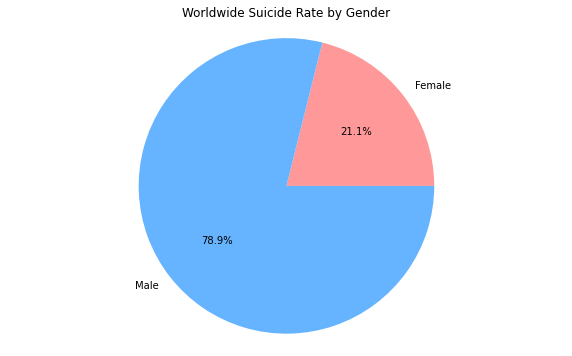

In [ ]:
rate_by_gender = df[['Suicides/100k Pop', 'Gender']].groupby(['Gender']).sum()
rate_by_gender.rename(columns={'Gender':'Gender','Suicides/100k Pop': 'Count'})
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(rate_by_gender['Suicides/100k Pop'],labels = ['Female', 'Male'], colors = ['#ff9999','#66b3ff'],autopct='%1.1f%%')
plt.title('Worldwide Suicide Rate by Gender')
plt.axis('equal')
plt.show()

From the pie-chart we can see that the suicide rate for males is overwhelmingly large compared to the female rate.

Text(0, 0.5, 'Suicides/100k Pop')

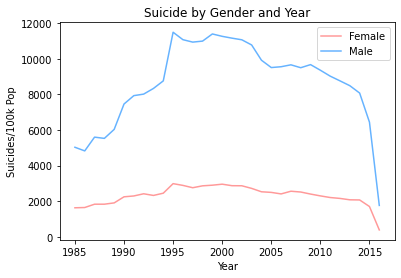

In [ ]:
gender_year = pd.DataFrame(df[['Suicides/100k Pop', 'Year', 'Gender', ]].groupby(['Year', 'Gender']).sum())

gender_year.unstack().plot(color = ['#ff9999','#66b3ff'], title = "Suicide by Gender and Year")
plt.legend(["Female", "Male"]);
plt.xlabel('Year')
plt.ylabel('Suicides/100k Pop')

Throughout the range of years, males make up the majority of the suicide rates of nearly 79%. Both males and females follow the trend, with rates increasing/decreasing throughout varying years. The suicide rate peaked in 1995 for both male and female and has declined since. The ratio between male and female was the smallest ever in 1985 before but increased dramatically after the spike in male suicide rates in 1995. The gap in ratio has declined since, but not significantly.

Next we will look at the suicide rate by generation:

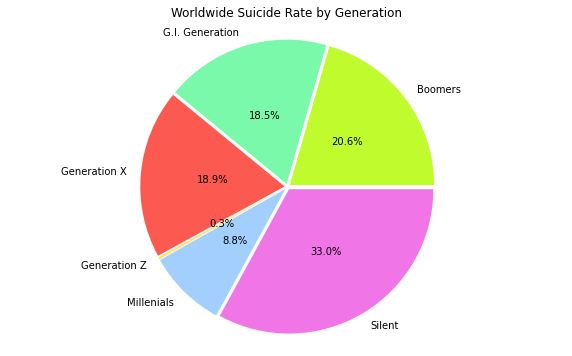

In [ ]:
rate_by_generation = df[['Suicides/100k Pop', 'Generation']].groupby(['Generation']).sum()
rate_by_generation.rename(columns={'Generation':'Generation','Suicides/100k Pop': 'Count'})
rate_by_generation.head()

pie, ax = plt.subplots(figsize=[10,6])
labels = ['Boomers', 'G.I. Generation', 'Generation X','Generation Z', 'Millenials', 'Silent']
plt.pie(rate_by_generation['Suicides/100k Pop'], autopct="%.1f%%", explode=[0.02]*6, labels=labels, 
        pctdistance=0.5, colors =  ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e',  '#a2cffe', '#f075e6'])
plt.title('Worldwide Suicide Rate by Generation')
plt.axis('equal')
plt.show()

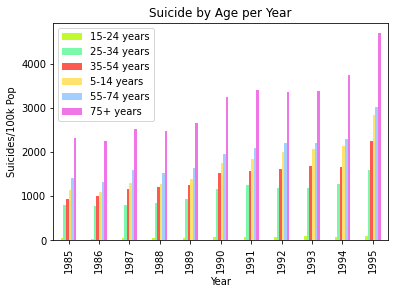

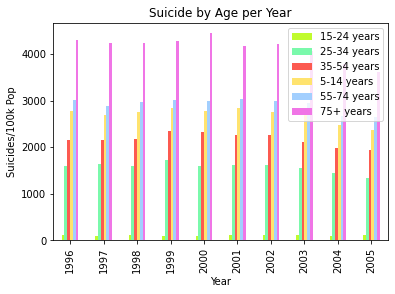

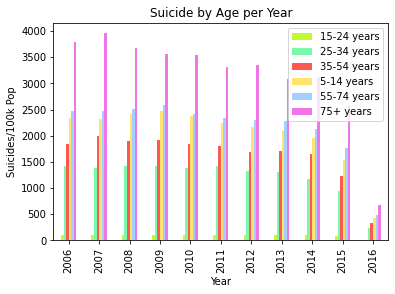

In [ ]:
ay = pd.DataFrame(df[['Suicides/100k Pop', 'Year', 'Age', ]].groupby(['Year', 'Age']).sum())

third_df = len(ay) // 3
ay1 = ay.iloc[:third_df + 2]
ay2 = ay.iloc[third_df + 2:(2 * third_df - 2)]
ay3 = ay.iloc[(2 * third_df - 2):]

age_legend = ['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']

ay1.unstack().plot(kind = 'bar', color = ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],
                   title = "Suicide by Age per Year", ylabel = 'Suicides/100k Pop')
plt.legend(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']);
ay2.unstack().plot(kind = 'bar', color = ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],
                   title = "Suicide by Age per Year", ylabel = 'Suicides/100k Pop')
plt.legend(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']);
ay3.unstack().plot(kind = 'bar', color = ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],
                   title = "Suicide by Age per Year", ylabel = 'Suicides/100k Pop')
plt.legend(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']);


As seen above, the order of the age-groups who commit suicide does not change through the years. This means those who are older are at more risk.

Text(0.5, 1.0, 'Worldwide Suicides per Year')

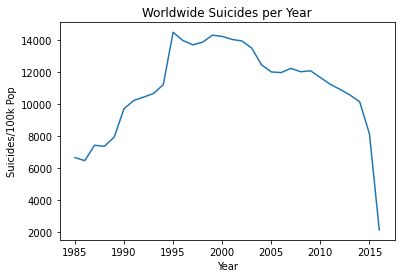

In [ ]:
rate_by_year = df[['Suicides/100k Pop', 'Year']].groupby(['Year']).sum()
sns.lineplot(data=rate_by_year, x="Year", y="Suicides/100k Pop").set_title("Worldwide Suicides per Year")

**Continent**

First I'd like to get an understanding of the representation of the continents in the dataset:

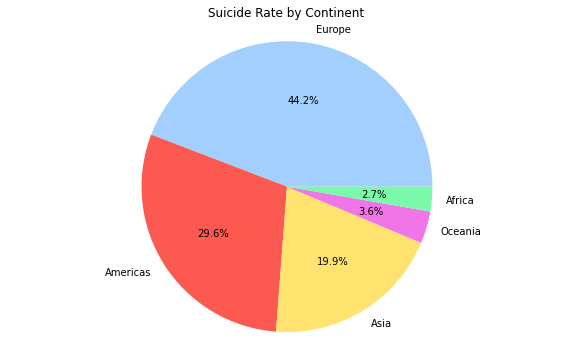

In [ ]:
suicide_by_count = df[['Continent']].value_counts()
suicide_by_count.head()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(suicide_by_count,labels = ['Europe', 'Americas', 'Asia', 'Oceania', 'Africa'],
        colors = ['#a2cffe','#fc5a50', '#ffe36e','#f075e6', '#7af9ab', ],autopct='%1.1f%%')
plt.title('Suicide Rate by Continent')
plt.axis('equal')
plt.show()

As seen above, Europe, Americas and Asia have a decent amount of representation, meanwhile Africa and Oceania have very little. This is not because of any biases the compiler of this dataset has, but because the suicide research in Africa is limited by a lack of systematic data collection. With less than 10% of African countries reporting mortality data to WHO, official statistics are available for only 15% of the continent’s total population. Ultimately this means that any analysis we do based on continent, is not entirely accurate. 

<br>
Works cited: https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-14-606/ 

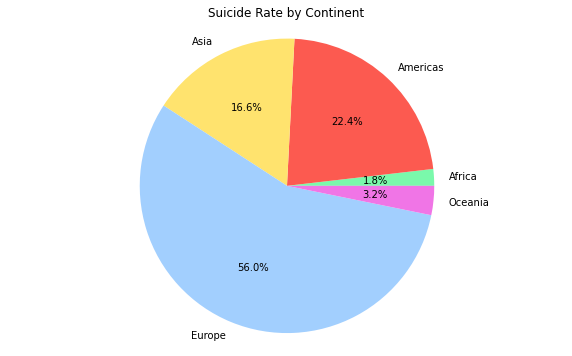

In [ ]:
suicide_by_continent = df[['Suicides/100k Pop', 'Continent']].groupby(['Continent']).sum()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(suicide_by_continent['Suicides/100k Pop'],labels = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
        colors = ['#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],autopct='%1.1f%%')
plt.title('Suicide Rate by Continent')
plt.axis('equal')
plt.show()

Europe seems to have the highest suicide rate, followed by Americas and Asia. That being said, it is important to keep in mind the representation of continents in the dataset and how that may affect the accuracy of these findings.

Text(0, 0.5, 'Suicides/100k Pop')

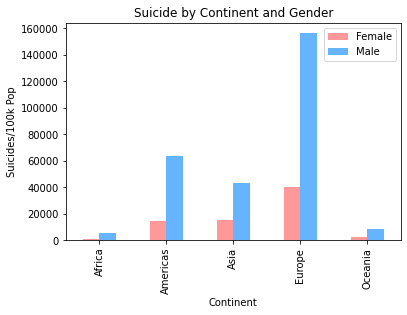

In [ ]:
gender_continent = df[['Suicides/100k Pop', 'Continent', 'Gender']].groupby(['Continent', 'Gender']).sum()
gender_continent.unstack().plot(kind = 'bar', color = ['#ff9999','#66b3ff'], title = "Suicide by Continent and Gender")
plt.legend(["Female", "Male"]);
plt.xlabel('Continent')
plt.ylabel('Suicides/100k Pop')

All continents follow the trend of males having a much larger suicide rate than females, but Europe shows the biggest difference in ratio.
<br>

Now let's take a look at the suicide rate by continent and age:

Text(0, 0.5, 'Suicides/100k Pop')

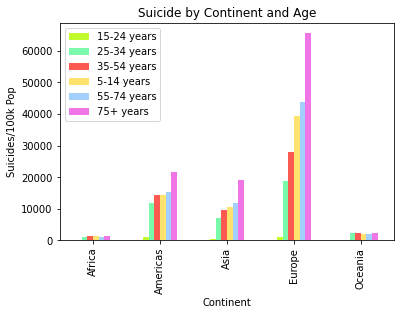

In [ ]:
age_continent = df[['Suicides/100k Pop', 'Continent', 'Age']].groupby(['Continent', 'Age']).sum()
age_continent.unstack().plot(kind = 'bar', color = ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'], 
                             title = "Suicide by Continent and Age")
plt.legend(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']);
plt.xlabel('Continent')
plt.ylabel('Suicides/100k Pop')

Americas, Asia and Europe follow the worldwide trend,  however Oceania and Africa do not. It is likely due to a lack of representation of data from these continents.

**Countries**

Now we'll look at each individual country. 

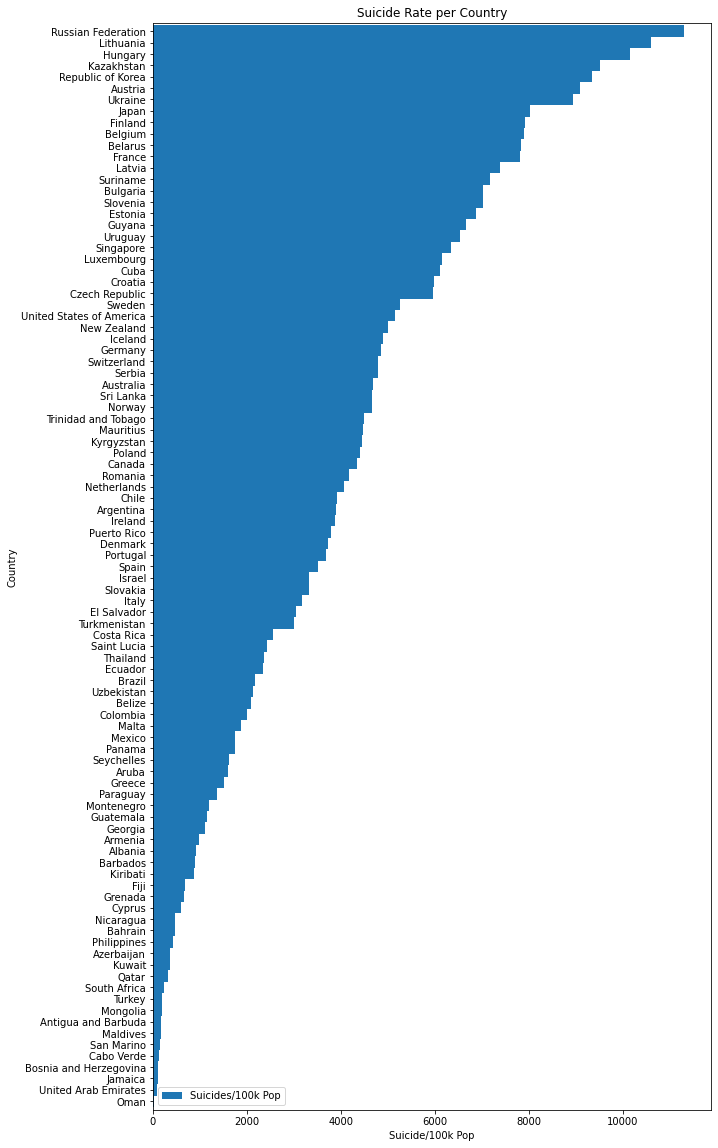

In [ ]:
suicide_by_country = df[['Suicides/100k Pop', 'Country']].groupby(['Country']).sum().sort_values(by = 'Suicides/100k Pop', 
                                                                                                 ascending = True)
    
cm = plt.cm.get_cmap('RdYlBu')    
suicide_by_country.plot(kind = 'barh', title = 'Suicide Rate per Country',
                         width = 1, linewidth=0.5, figsize = [10, 20])

plt.xlabel("Suicide/100k Pop")
plt.ylabel("Country")
plt.show()

This gives us a general idea of which countries are affected by suicide the most. Let's take a closer look:

In [ ]:
country_avg = df.groupby(['Country','Gender']).agg({'GDP Per Capita':'mean', 'Suicide No.':'mean', 'Population':'mean'}).sort_values(by=['Suicide No.'], ascending=False).reset_index()
country_avg['Suicides by the Population'] = country_avg['Suicide No.'] / country_avg['Population']
country_avg = country_avg.sort_values(by=['Suicides by the Population'], ascending=False)
country_avg['Suicides by the Population'].mean()
country_avg.head(15)

,Country,Gender,GDP Per Capita,Suicide No.,Population,Suicides by the Population
41,Lithuania,male,9280.549618,175.786260,2.402566e+05,0.000732
0,Russian Federation,male,6518.814815,6144.518519,1.055612e+07,0.000582
22,Belarus,male,3333.904762,395.952381,7.280138e+05,0.000544
62,Latvia,male,8786.173554,85.090909,1.653596e+05,0.000515
24,Hungary,male,9337.824675,362.181818,7.625801e+05,0.000475
88,Estonia,male,11271.958333,47.008333,1.007657e+05,0.000467
12,Sri Lanka,male,904.272727,637.015152,1.379687e+06,0.000462
13,Kazakhstan,male,5329.115385,534.525641,1.161898e+06,0.000460
70,Slovenia,male,18366.796610,70.449153,1.603450e+05,0.000439
3,Ukraine,male,1867.535714,1539.125000,3.521422e+06,0.000437


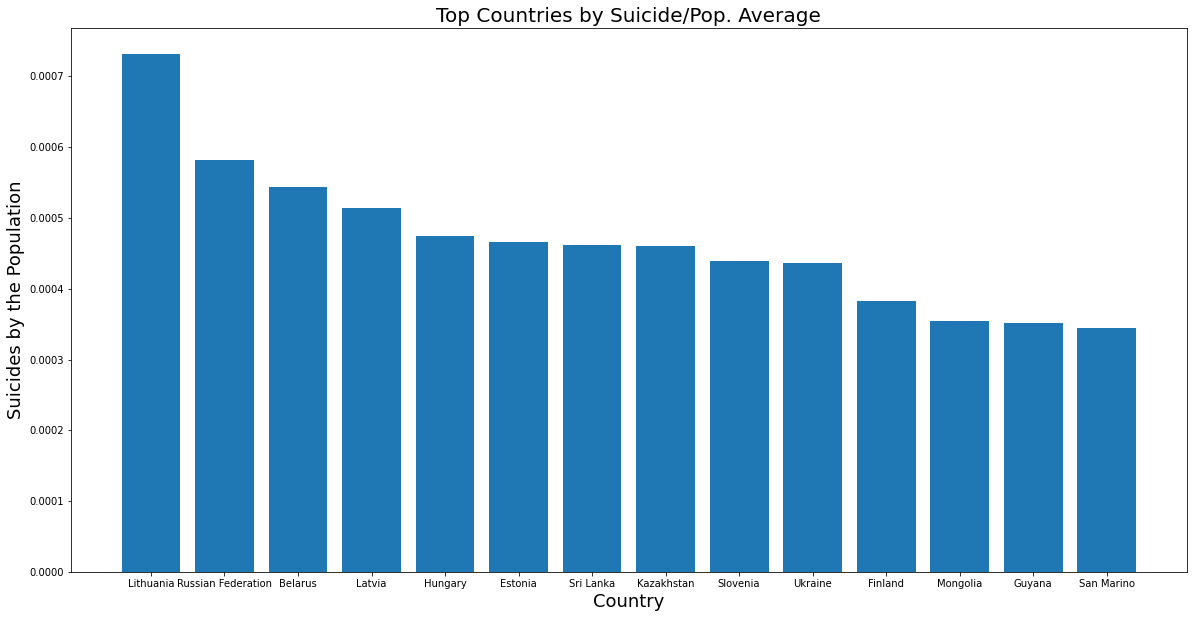

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(country_avg['Country'].head(14), country_avg['Suicides by the Population'].head(14));
plt.title("Top Countries by Suicide/Pop. Average", fontsize=20)
plt.ylabel("Suicides by the Population", fontsize=18)
plt.xlabel("Country", fontsize=18);

If we observe the figures displaying the average of suicides by population per year vs the suicide/population average by country, we can relate the significant increase in suicide rates after 1990, where it peaks in 1995, to the effects of the dissolution of the Soviet Union in 1991. Hence, many of the top countries displayed above are countries that formed from the fall of the Soviet Union (Burke, 2014).
<br>

Works Cited:
https://www.theguardian.com/world/2014/jun/09/-sp-profiles-post-soviet-states
<br>

Next we'll look at the gender per each country:

Text(0, 0.5, 'Suicides/100k Pop')

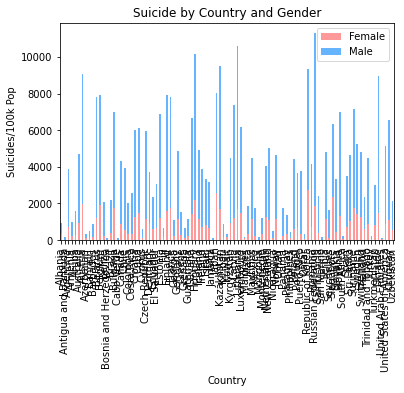

In [ ]:
gender_country = df[['Suicides/100k Pop', 'Country', 'Gender']].groupby(['Country', 'Gender']).sum()
gender_country.unstack().plot(kind = 'bar', stacked=True, color = ['#ff9999','#66b3ff'],
                              title = "Suicide by Country and Gender")
plt.legend(["Female", "Male"]);
plt.xlabel('Country')
plt.ylabel('Suicides/100k Pop')


All contries follow the trend of male suicide rates being much greater than their female counterparts.

**Global Death Cause**

We have analyzed another dataset (combination of continent and global deaths), which gives us a different perspective as to what causes deaths.

We have not included deaths from diseases as we wanted to analyze the deaths by external causes, as suicide is mostly triggred by major events which affects the population as whole. (i.e., Terrorism induces fear in citizen, Natural disaster can cause an individual to lose someone or loss of property)

This plot shows Death by Causes

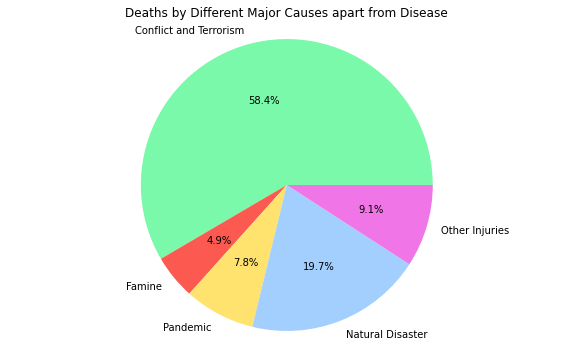

In [ ]:
deaths_by_causes = dt[['Deaths', 'Cause']].groupby(['Cause']).sum()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(deaths_by_causes['Deaths'],labels = ['Conflict and Terrorism', 'Famine', 'Pandemic', 'Natural Disaster', 'Other Injuries'],
        colors = ['#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],autopct='%1.1f%%')
plt.title('Deaths by Different Major Causes apart from Disease')
plt.axis('equal')
plt.show()

This plot shows the deaths occured by continents

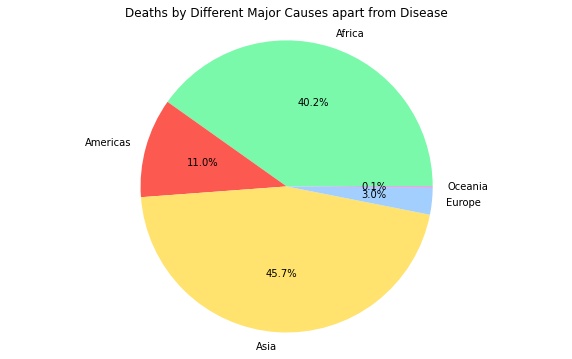

In [ ]:
deaths_by_continent = dt[['Deaths', 'Continent']].groupby(['Continent']).sum()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(deaths_by_continent['Deaths'],labels = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
        colors = ['#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],autopct='%1.1f%%')
plt.title('Deaths by Different Major Causes apart from Disease')
plt.axis('equal')
plt.show()

This plot shows the trend line of deaths by year

Text(0.5, 1.0, 'Worldwide Deaths per Year')

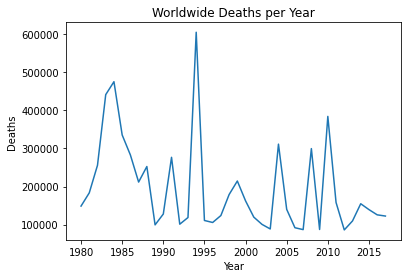

In [ ]:
death_by_year = dt[['Deaths', 'Year']].groupby(['Year']).sum()
sns.lineplot(data=death_by_year, x="Year", y="Deaths").set_title("Worldwide Deaths per Year")

This plot shows the deaths by countries

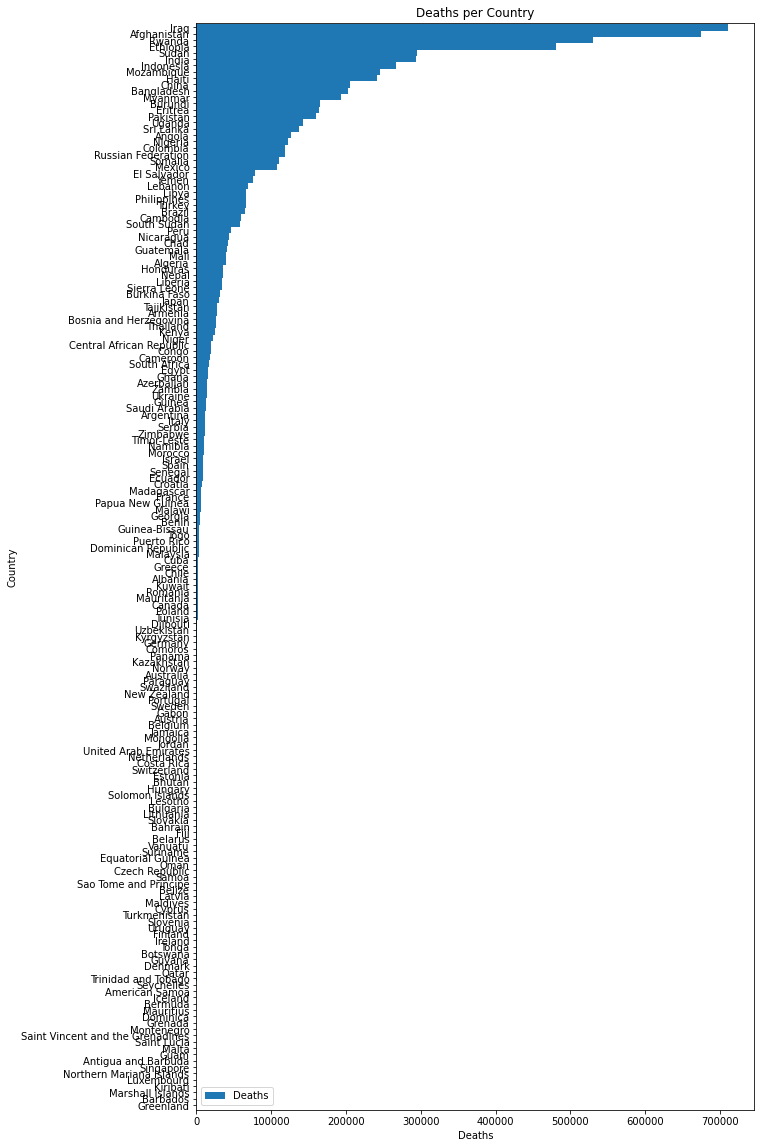

In [ ]:
deaths_by_country = dt[['Deaths', 'Country']].groupby(['Country']).sum().sort_values(by = 'Deaths', 
                                                                                                 ascending = True)
    
cm = plt.cm.get_cmap('RdYlBu')    
deaths_by_country.plot(kind = 'barh', title = 'Deaths per Country',
                         width = 1, linewidth=0.5, figsize = [10, 20])

plt.xlabel("Deaths")
plt.ylabel("Country")
plt.show()

## Potential Data Science

1) Regressive analysis can demonstrate the relationship between unique independent variables (population, GDP, etc.) and the dependent variable (number of suicides). How x and y interact can provide insight into trends pertaining to the increase/decrease of the number of suicides. 

2) Visual models can be used to highlight the differences between variables; bringing attention to certain socio-economic factors which should be considered in the prevention of suicide. Visual models include bar graphs, world maps, pie charts, etc. 

3) Time-series model can be used to predict future trends pertaining to the growth, decrease, or levelling of suicide rates. 

4) A clustering model, which combines certain attributes can be used to determine its relation of multiple independent variables to the dependent variable (increased suicide risks).

### Conclusion

In this project, the concept is to analyze statistically significant data on suicide rate. All in all, we see that the details show what we see in the newspapers, on television and so on, in our view many of the conclusions we reached were already predicted; just think of the tremendous number of teen suicides, never seen in the data.

- The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as middle aged adults.
- Suicide is one of the leading causes of death among all Canadian adults. Data show alarming differences in suicide for different sexes. It’s evident that males are more inclined to suicide, than females. In addition, Mental health is a major predictor for suicide.
- Young people age between 15-29 are at the highest risk among all age groups.


One of the limitations we faced was in the representation of data for certain continents/countries. We found that Africa and Oceania were serverely underrepresented and that affected the accuracy of our findings. 